In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
with open('Traffic_Accidents.csv') as f:
    df = pd.read_csv(f)

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,Harmful Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location
0,20200606233,"September 21, 2020 06:37 PM",1.0,0,0,NaN,False,311344.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,TREE;Ran Off Road-Left,LEWIS ST & FAIN ST,NASHVILLE,TN,37210.0,8207.0,HERMIT,36.1518,-86.7580,POINT (-86.758 36.1518)
1,20200603908,"September 20, 2020 12:00 AM",1.0,0,0,True,True,409155.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,MAIL BOX,RICHMOND HILL DR & CARTERWOOD DR,NASHVILLE,TN,37207.0,2005.0,MADISO,36.2323,-86.7733,POINT (-86.7733 36.2323)
2,20200604395,"September 20, 2020 07:20 PM",1.0,1,0,NaN,False,330419.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,OTHER ANIMAL,SHUTE LN & SAUNDERSVILLE RD,OLD HICKORY,TN,37138.0,9717.0,HERMIT,36.2267,-86.6032,POINT (-86.6032 36.2267)
3,20200605021,"September 21, 2020 05:58 AM",2.0,0,0,NaN,False,256569.0,5.0,SIDESWIPE - SAME DIRECTION,...,MOTOR VEHICLE IN TRANSPORT,MURFREESBORO PKE & WILHAGAN RD,NASHVILLE,TN,37217.0,8801.0,SOUTH,36.1325,-86.7193,POINT (-86.7193 36.1325)
4,20200605988,"September 21, 2020 03:27 PM",2.0,0,0,NaN,False,179606.0,11.0,Front to Rear,...,MOTOR VEHICLE IN TRANSPORT,NOLENSVILLE PKE & WOODYCREST AV,NASHVILLE,TN,37211.0,8041.0,MIDTOW,36.1312,-86.7562,POINT (-86.7562 36.1312)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214596,20210529661,"October 10, 2021 08:53 PM",2.0,0,0,NaN,False,4000726.0,4.0,ANGLE,...,MOTOR VEHICLE IN TRANSPORT;UTILITY POLE,PEABODY ST & 6TH AVS,NASHVILLE,TN,37203.0,4039.0,CENTRA,36.1549,-86.7767,POINT (-86.7767 36.1549)
214597,20210529129,"October 10, 2021 01:24 AM",2.0,0,0,NaN,True,4004451.0,5.0,SIDESWIPE - SAME DIRECTION,...,PARKED MOTOR VEHICLE,NEILL AV & MANSFIELD CT,NASHVILLE,TN,37206.0,1915.0,EAST,36.1816,-86.7600,POINT (-86.76 36.1816)
214598,20210529262,"October 10, 2021 02:30 PM",3.0,1,0,NaN,False,4001100.0,11.0,Front to Rear,...,MOTOR VEHICLE IN TRANSPORT,MM 77 5 I 65,NASHVILLE,TN,37220.0,86042.0,MIDTOW,36.0775,-86.7663,POINT (-86.7663 36.0775)
214599,20210529382,"October 10, 2021 12:00 AM",2.0,1,0,NaN,False,4001002.0,9.0,UNKNOWN,...,MOTOR VEHICLE IN TRANSPORT;UNKNOWN MOST HARMFU...,MM 58 2 I 24,ANTIOCH,TN,37013.0,87060.0,SOUTH,36.0564,-86.6761,POINT (-86.6761 36.0564)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214601 entries, 0 to 214600
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident Number             214601 non-null  int64  
 1   Date and Time               214601 non-null  object 
 2   Number of Motor Vehicles    214600 non-null  float64
 3   Number of Injuries          214601 non-null  int64  
 4   Number of Fatalities        214601 non-null  int64  
 5   Property Damage             15827 non-null   object 
 6   Hit and Run                 214584 non-null  object 
 7   Reporting Officer           214591 non-null  float64
 8   Collision Type Code         214585 non-null  float64
 9   Collision Type Description  214585 non-null  object 
 10  Weather Code                209302 non-null  float64
 11  Weather Description         209302 non-null  object 
 12  Illumination Code           214312 non-null  float64
 13  Illumination D

In [56]:
# Bỏ các thuộc tính không có ý nghĩa 

df = df.drop(['Accident Number'],axis = 1)
df = df.drop(['Collision Type Code'],axis = 1)
df = df.drop(['Weather Code'],axis = 1)
df = df.drop(['Illumination Code'], axis = 1)
df = df.drop(['Harmful Code'],axis = 1)
df = df.drop(['Reporting Officer','ZIP', 'RPA', 'Precinct', 'Latitude', 'Longitude' , 'Mapped Location'],axis = 1)
df = df.drop(['Property Damage'],axis = 1)
df = df.drop(['Street Address'],axis = 1)
df = df.drop(['Harmful Description'],axis = 1)
df = df.drop(['Date and Time'],axis = 1)
df

,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Hit and Run,Collision Type Description,Weather Description,Illumination Description,City,State
0,1.0,0,0,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DUSK,NASHVILLE,TN
1,1.0,0,0,True,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DAYLIGHT,NASHVILLE,TN
2,1.0,1,0,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,NaN,DARK - LIGHTED,OLD HICKORY,TN
3,2.0,0,0,False,SIDESWIPE - SAME DIRECTION,NaN,DAWN,NASHVILLE,TN
4,2.0,0,0,False,Front to Rear,NaN,DAYLIGHT,NASHVILLE,TN
...,...,...,...,...,...,...,...,...,...
214596,2.0,0,0,False,ANGLE,CLEAR,DARK - LIGHTED,NASHVILLE,TN
214597,2.0,0,0,True,SIDESWIPE - SAME DIRECTION,CLEAR,DARK - NOT LIGHTED,NASHVILLE,TN
214598,3.0,1,0,False,Front to Rear,CLEAR,DAYLIGHT,NASHVILLE,TN
214599,2.0,1,0,False,UNKNOWN,CLEAR,DAYLIGHT,ANTIOCH,TN


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214601 entries, 0 to 214600
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Number of Motor Vehicles    214600 non-null  float64
 1   Number of Injuries          214601 non-null  int64  
 2   Number of Fatalities        214601 non-null  int64  
 3   Hit and Run                 214584 non-null  object 
 4   Collision Type Description  214585 non-null  object 
 5   Weather Description         209302 non-null  object 
 6   Illumination Description    214312 non-null  object 
 7   City                        214601 non-null  object 
 8   State                       214601 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 14.7+ MB


In [58]:
#Xử lí dữ liệu bị thiếu
total = df.isnull().sum().sort_values(ascending=False) #Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm
percent_1=df.isnull().sum()/df.isnull().count()*100 #Tổng giá trị null của một cột/ số dòng của cột null đó 
percent_2 = (round(percent_1,1)).sort_values(ascending = False) #Làm tròn 1 chữ số và sort giảm dần
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(11)

,Total,%
Weather Description,5299,2.5
Illumination Description,289,0.1
Hit and Run,17,0.0
Collision Type Description,16,0.0
Number of Motor Vehicles,1,0.0
Number of Injuries,0,0.0
Number of Fatalities,0,0.0
City,0,0.0
State,0,0.0


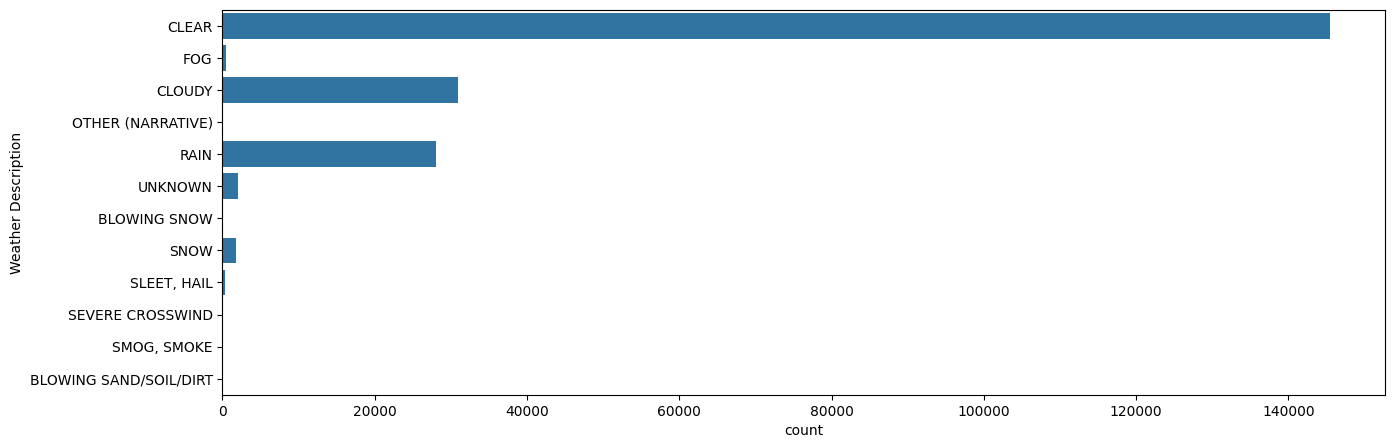

In [39]:
#Xem thuộc tính Weather Description	
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'Weather Description',data =df)
plt.show()

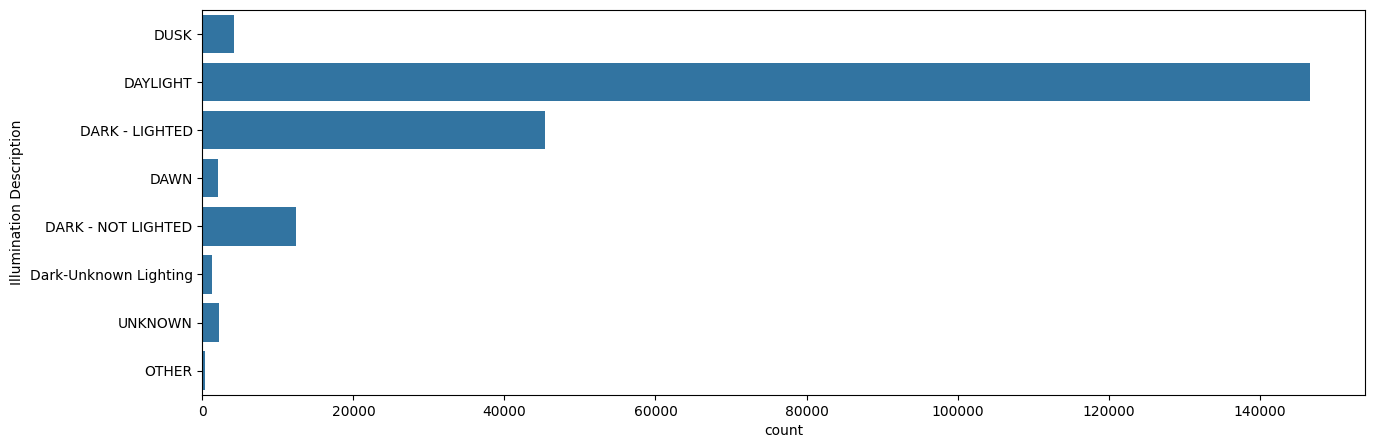

In [17]:
#Xem thuộc tính Illumination Description
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'Illumination Description',data =df)
plt.show()

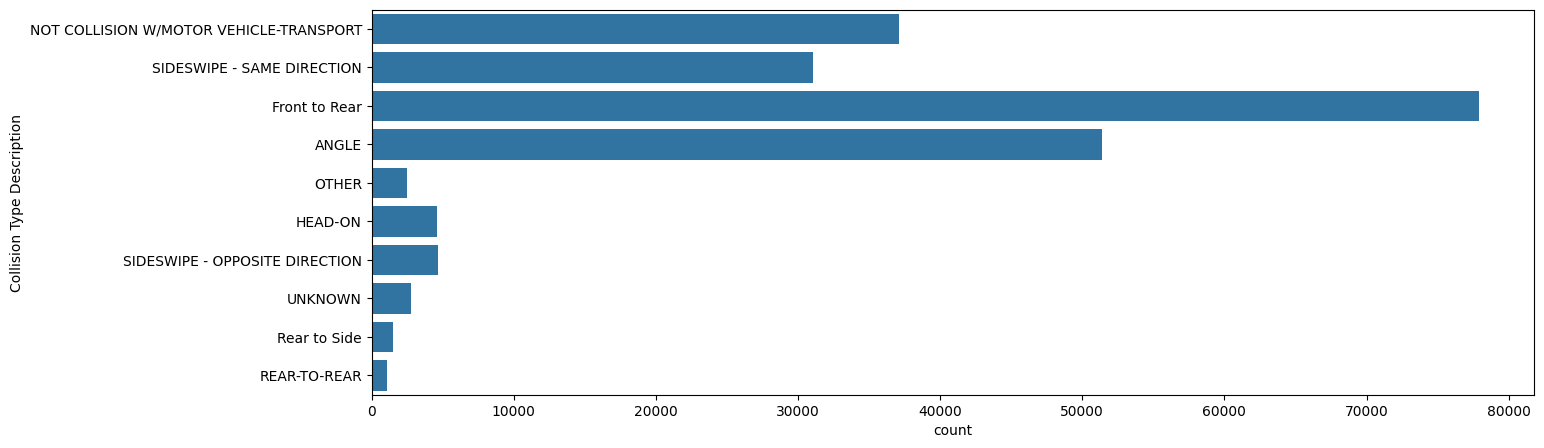

In [18]:
#Xem thuộc tính Collision Type Description
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'Collision Type Description',data =df)
plt.show()

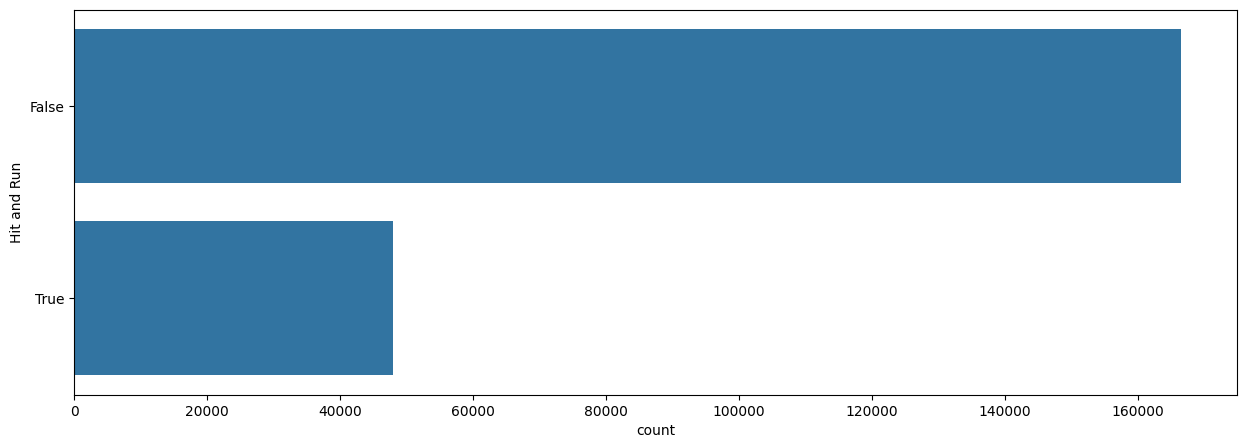

In [19]:
#Xem thuộc tính Hit and Run
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'Hit and Run',data =df)
plt.show()

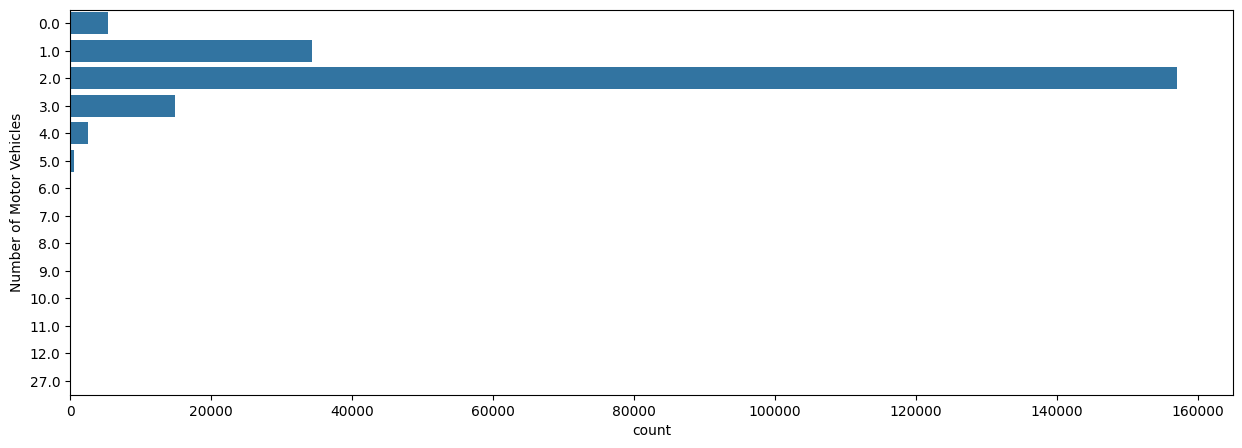

In [20]:
#Xem thuộc tính Number of Motor Vehicles
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'Number of Motor Vehicles',data =df)
plt.show()

In [59]:
#Thay thế thuộc tính có Unkown bằng NaN
df.replace('Unknown',np.nan,inplace=True)
df.replace('UNKNOWN',np.nan,inplace=True)
df

,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Hit and Run,Collision Type Description,Weather Description,Illumination Description,City,State
0,1.0,0,0,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DUSK,NASHVILLE,TN
1,1.0,0,0,True,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DAYLIGHT,NASHVILLE,TN
2,1.0,1,0,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,NaN,DARK - LIGHTED,OLD HICKORY,TN
3,2.0,0,0,False,SIDESWIPE - SAME DIRECTION,NaN,DAWN,NASHVILLE,TN
4,2.0,0,0,False,Front to Rear,NaN,DAYLIGHT,NASHVILLE,TN
...,...,...,...,...,...,...,...,...,...
214596,2.0,0,0,False,ANGLE,CLEAR,DARK - LIGHTED,NASHVILLE,TN
214597,2.0,0,0,True,SIDESWIPE - SAME DIRECTION,CLEAR,DARK - NOT LIGHTED,NASHVILLE,TN
214598,3.0,1,0,False,Front to Rear,CLEAR,DAYLIGHT,NASHVILLE,TN
214599,2.0,1,0,False,NaN,CLEAR,DAYLIGHT,ANTIOCH,TN


In [60]:
test = df.dropna()
test

,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Hit and Run,Collision Type Description,Weather Description,Illumination Description,City,State
0,1.0,0,0,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DUSK,NASHVILLE,TN
1,1.0,0,0,True,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DAYLIGHT,NASHVILLE,TN
5,2.0,0,0,False,Front to Rear,CLEAR,DAYLIGHT,NASHVILLE,TN
6,2.0,0,0,True,Front to Rear,CLEAR,DAYLIGHT,NASHVILLE,TN
8,2.0,0,0,True,ANGLE,CLEAR,DARK - NOT LIGHTED,HERMITAGE,TN
...,...,...,...,...,...,...,...,...,...
214595,3.0,0,0,False,Front to Rear,CLEAR,DAYLIGHT,NASHVILLE,TN
214596,2.0,0,0,False,ANGLE,CLEAR,DARK - LIGHTED,NASHVILLE,TN
214597,2.0,0,0,True,SIDESWIPE - SAME DIRECTION,CLEAR,DARK - NOT LIGHTED,NASHVILLE,TN
214598,3.0,1,0,False,Front to Rear,CLEAR,DAYLIGHT,NASHVILLE,TN


In [68]:
test.to_csv('data_daxuly.csv')
df2 = pd.read_csv('data_daxuly.csv')
df2

,Unnamed: 0,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Hit and Run,Collision Type Description,Weather Description,Illumination Description,City,State
0,0,1.0,0,0,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DUSK,NASHVILLE,TN
1,1,1.0,0,0,True,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DAYLIGHT,NASHVILLE,TN
2,5,2.0,0,0,False,Front to Rear,CLEAR,DAYLIGHT,NASHVILLE,TN
3,6,2.0,0,0,True,Front to Rear,CLEAR,DAYLIGHT,NASHVILLE,TN
4,8,2.0,0,0,True,ANGLE,CLEAR,DARK - NOT LIGHTED,HERMITAGE,TN
...,...,...,...,...,...,...,...,...,...,...
204569,214595,3.0,0,0,False,Front to Rear,CLEAR,DAYLIGHT,NASHVILLE,TN
204570,214596,2.0,0,0,False,ANGLE,CLEAR,DARK - LIGHTED,NASHVILLE,TN
204571,214597,2.0,0,0,True,SIDESWIPE - SAME DIRECTION,CLEAR,DARK - NOT LIGHTED,NASHVILLE,TN
204572,214598,3.0,1,0,False,Front to Rear,CLEAR,DAYLIGHT,NASHVILLE,TN


In [69]:
df2 = df2.drop(['Unnamed: 0'],axis = 1)
df2 = df2.drop(['Number of Fatalities'],axis = 1)
df2

,Number of Motor Vehicles,Number of Injuries,Hit and Run,Collision Type Description,Weather Description,Illumination Description,City,State
0,1.0,0,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DUSK,NASHVILLE,TN
1,1.0,0,True,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DAYLIGHT,NASHVILLE,TN
2,2.0,0,False,Front to Rear,CLEAR,DAYLIGHT,NASHVILLE,TN
3,2.0,0,True,Front to Rear,CLEAR,DAYLIGHT,NASHVILLE,TN
4,2.0,0,True,ANGLE,CLEAR,DARK - NOT LIGHTED,HERMITAGE,TN
...,...,...,...,...,...,...,...,...
204569,3.0,0,False,Front to Rear,CLEAR,DAYLIGHT,NASHVILLE,TN
204570,2.0,0,False,ANGLE,CLEAR,DARK - LIGHTED,NASHVILLE,TN
204571,2.0,0,True,SIDESWIPE - SAME DIRECTION,CLEAR,DARK - NOT LIGHTED,NASHVILLE,TN
204572,3.0,1,False,Front to Rear,CLEAR,DAYLIGHT,NASHVILLE,TN


In [70]:
feature = df2.drop('Hit and Run',axis=1)
label = df2['Hit and Run']
feature.select_dtypes(exclude=['int64']).columns

Index(['Number of Motor Vehicles', 'Collision Type Description',
       'Weather Description', 'Illumination Description', 'City', 'State'],
      dtype='object')

In [71]:
feature_onehot = pd.get_dummies(feature,columns=feature.select_dtypes(exclude=['int64']).columns)
feature_onehot

,Number of Injuries,Number of Motor Vehicles_0.0,Number of Motor Vehicles_1.0,Number of Motor Vehicles_2.0,Number of Motor Vehicles_3.0,Number of Motor Vehicles_4.0,Number of Motor Vehicles_5.0,Number of Motor Vehicles_6.0,Number of Motor Vehicles_7.0,Number of Motor Vehicles_8.0,...,City_LAVERGNE,City_MADISON,City_MOUNT JULIET,City_NASHVILLE,City_NOLENSVILLE,City_OLD HICKORY,City_PEGRAM,City_SPRING HILL,City_WHITES CREEK,State_TN
0,0,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,0,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,0,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204569,0,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
204570,0,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
204571,0,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
204572,1,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [73]:
X_train,X_test,y_train,y_test = train_test_split(feature_onehot,label,test_size=0.3,random_state=42)

### Decision Tree

In [91]:
clf1 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf1.fit(X_train,y_train)
tree_pred1 = clf1.predict(X_test)
tree_score1 = metrics.accuracy_score(y_test,tree_pred1)
print("Độ chính xác:",tree_score1)
print("Report:",metrics.classification_report(y_test,tree_pred1))

Độ chính xác: 0.7879360630896323
Report:               precision    recall  f1-score   support

       False       0.79      0.99      0.88     48407
        True       0.48      0.05      0.09     12966

    accuracy                           0.79     61373
   macro avg       0.64      0.52      0.49     61373
weighted avg       0.73      0.79      0.71     61373



### Naive Bayes

In [92]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train,y_train).predict(X_test)
bayes_score = metrics.accuracy_score(y_test,bayes_pred)
print("Độ chính xác:",bayes_score)
print("Report:",metrics.classification_report(y_test,bayes_pred))

Độ chính xác: 0.22643507731412837
Report:               precision    recall  f1-score   support

       False       0.89      0.02      0.04     48407
        True       0.21      0.99      0.35     12966

    accuracy                           0.23     61373
   macro avg       0.55      0.51      0.20     61373
weighted avg       0.75      0.23      0.11     61373



### KNN

In [89]:
knn = KNeighborsClassifier()
knn_pred = knn.fit(X_train, y_train).predict(X_test)
knn_score = metrics.accuracy_score(y_test, knn_pred)
print("Độ chính xác:", knn_score)
print("Report:", metrics.classification_report(y_test, knn_pred))

Độ chính xác: 0.7166180568002216
Report:               precision    recall  f1-score   support

       False       0.81      0.84      0.82     48407
        True       0.29      0.24      0.26     12966

    accuracy                           0.72     61373
   macro avg       0.55      0.54      0.54     61373
weighted avg       0.70      0.72      0.71     61373



### Random forest

In [90]:
rf = RandomForestClassifier()
rf_pred = rf.fit(X_train, y_train).predict(X_test)
rf_score = metrics.accuracy_score(y_test, rf_pred)
print("Độ chính xác:", rf_score)
print("Report:", metrics.classification_report(y_test, rf_pred))

Độ chính xác: 0.7877568311798347
Report:               precision    recall  f1-score   support

       False       0.80      0.98      0.88     48407
        True       0.48      0.05      0.10     12966

    accuracy                           0.79     61373
   macro avg       0.64      0.52      0.49     61373
weighted avg       0.73      0.79      0.71     61373

